In [24]:
import os
import pandas as pd
import webbrowser

import seaborn as sns
sns.set()

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sriharis', api_key='p8spnf2VsxL5iKxajOu0')

from DataExtractor import DataExtractor
from DataUtils import *
from VizTools import *


In [3]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'

start_year = 2001
end_year = 2017
all_year_data = []

columns_to_select = ["Arrest", 
                     "Date", 
                     "Year", 
                     "crime_count", 
                     "day", 
                     "month", 
                     # "quarter", 
                     # "week_no"
                     ]

for year in range(start_year, end_year+1):
    # print("Pulling year:", year)
    cols = ''.join(s+", " for s in columns_to_select)
    query = "SELECT " + cols[:-2] + " FROM crime_" + str(year) + ";"
    # print(query)
    data_extractor = DataExtractor()
    year_df = data_extractor.read_db(db=db, query=query)
    print("Pulled", year_df.shape[0], "rows of data for year", year)
    # print(year_df.shape)
    all_year_data.append(year_df)


Pulled 485560 rows of data for year 2001


Pulled 486596 rows of data for year 2002


Pulled 475732 rows of data for year 2003


Pulled 469167 rows of data for year 2004


Pulled 453520 rows of data for year 2005


Pulled 447924 rows of data for year 2006


Pulled 436793 rows of data for year 2007


Pulled 426866 rows of data for year 2008


Pulled 392498 rows of data for year 2009


Pulled 370152 rows of data for year 2010


Pulled 351619 rows of data for year 2011


Pulled 335788 rows of data for year 2012


Pulled 306918 rows of data for year 2013


Pulled 275071 rows of data for year 2014


Pulled 263771 rows of data for year 2015


Pulled 268691 rows of data for year 2016


Pulled 267626 rows of data for year 2017


In [5]:
# What are out columns?
print_columns(all_year_data[0])

Dataframe columns :
	 Arrest	 Date	 Year	 crime_count	 day	 month

In [6]:
# How has crime behaved over the months for all these years?
# Aggregate crime at a day level to check for trends
agg_data = pd.DataFrame(columns=["Year", "month", "day", "Arrest", "crime_count"])
for year_data in all_year_data:
    year_agg = year_data.groupby(by=["Year", "month", "day"], as_index=False).sum()
    year_agg = year_agg[["Year", "month", "day", "Arrest", "crime_count"]]
    agg_data = agg_data.append(year_agg, ignore_index=True)

def get_date_df(row):
    df = pd.DataFrame({
        'year':row["Year"],
        'month':row["month"],
        'day':row["day"],
        },
        index=[0])
    return df

agg_data["Date"] = agg_data.apply(lambda row:
                                  pd.to_datetime(get_date_df(row)), 
                                  axis=1)

agg_data["day_name"] = agg_data.apply(lambda row:
                                  row["Date"].strftime("%A"), 
                                  axis=1)

agg_data.head()

,Year,month,day,Arrest,crime_count,Date,day_name
0,2001,1,1,386,1625,2001-01-01,Monday
1,2001,1,2,383,1143,2001-01-02,Tuesday
2,2001,1,3,343,1151,2001-01-03,Wednesday
3,2001,1,4,377,1166,2001-01-04,Thursday
4,2001,1,5,415,1267,2001-01-05,Friday


In [30]:
data = []
# Create traces for each year
for year in agg_data["Year"].unique():
    trace = go.Scatter(
        x = agg_data[agg_data["Year"] == year]["Date"],
        y = agg_data[agg_data["Year"] == year]["crime_count"],
        name = str(year)
    )
    data.append(trace)
    
py.iplot(data)

<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~sriharis/16.embed" height="525px" width="100%"></iframe>

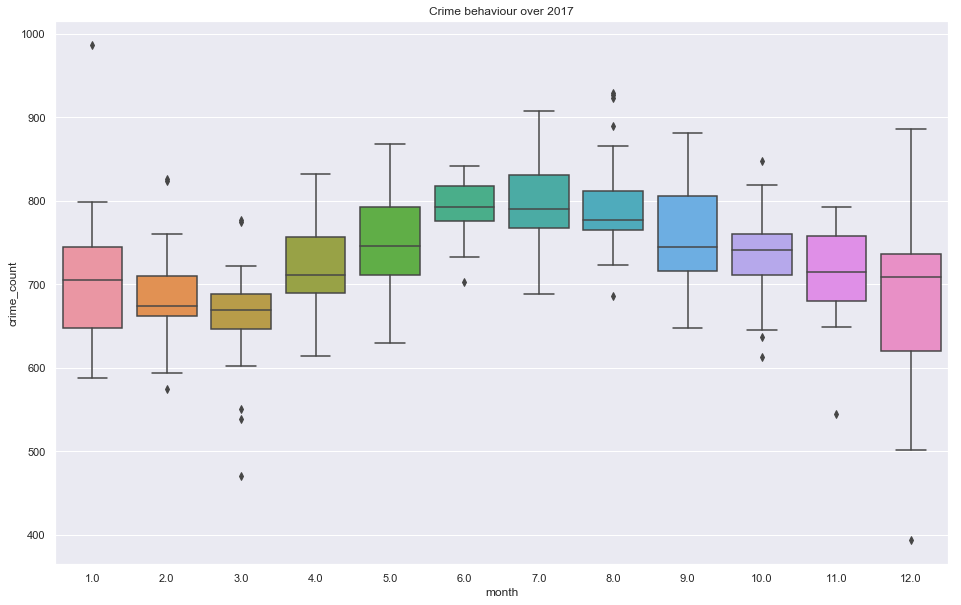

In [64]:
# If we assume that crime behaves consistently through a year, let's plot distribution plots for 2017's months
temp_data = agg_data[agg_data["Year"] == 2017][["Year", "month", "crime_count"]]
temp_data["Year"] = temp_data["Year"].astype(float)
temp_data["month"] = temp_data["month"].astype(float)
temp_data["crime_count"] = temp_data["crime_count"].astype(float)
plt.figure(figsize=(16, 10))
plt.title("Crime behaviour over 2017")
g = sns.boxplot(x="month", y="crime_count", data=temp_data)

In [ ]:
# What about arrests made?
arrest_map = {}
for year_data in all_year_data:
    arrest_map[year_data["Year"].unique()[0]] = dict({
        0:year_data["Arrest"].value_counts()[0],
        1:year_data["Arrest"].value_counts()[1],
    })
arrest_df = pd.DataFrame(arrest_map).transpose()
arrest_df.columns = ["not_arrested", "arrested"]

# But was there a percentage change?
arrest_df["not_arrested_%"] = arrest_df.apply(lambda row: 
                                              (row["not_arrested"] / (row["not_arrested"] + row["arrested"])) * 100,
                                              axis=1
                                              )
arrest_df["arrested_%"] = arrest_df.apply(lambda row: 100-row["not_arrested_%"], axis=1)


arrest_df.head()


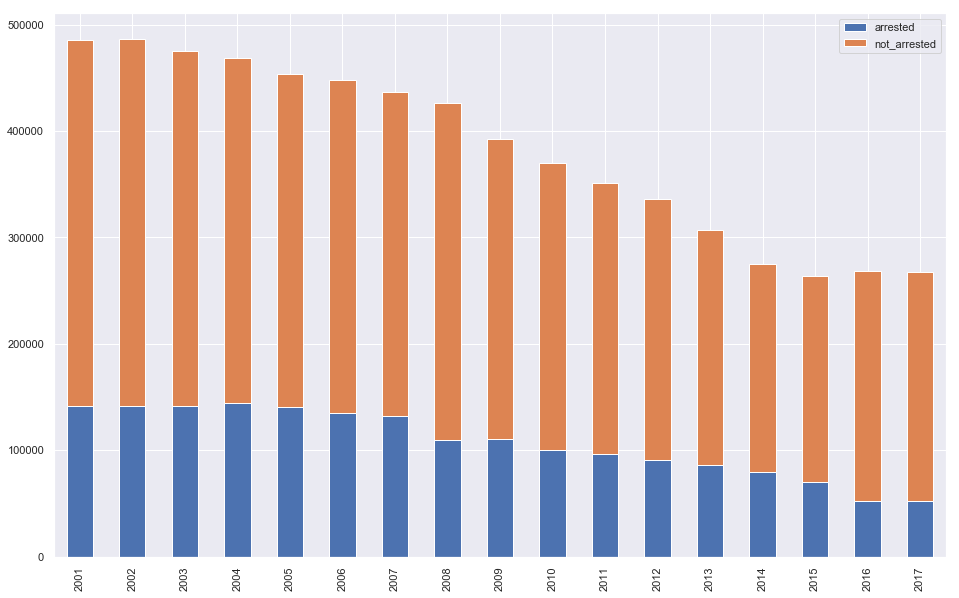

In [27]:
# How many were arrested? 
arrest_df[["arrested", "not_arrested"]].plot(kind='bar', stacked=True, figsize=(16,10))

In [ ]:
# What about in percentage? Was there any improvement there?
arrest_df[["arrested_%", "not_arrested_%"]].plot(kind='bar', stacked=True, figsize=(16,10), ylim=[0,120])

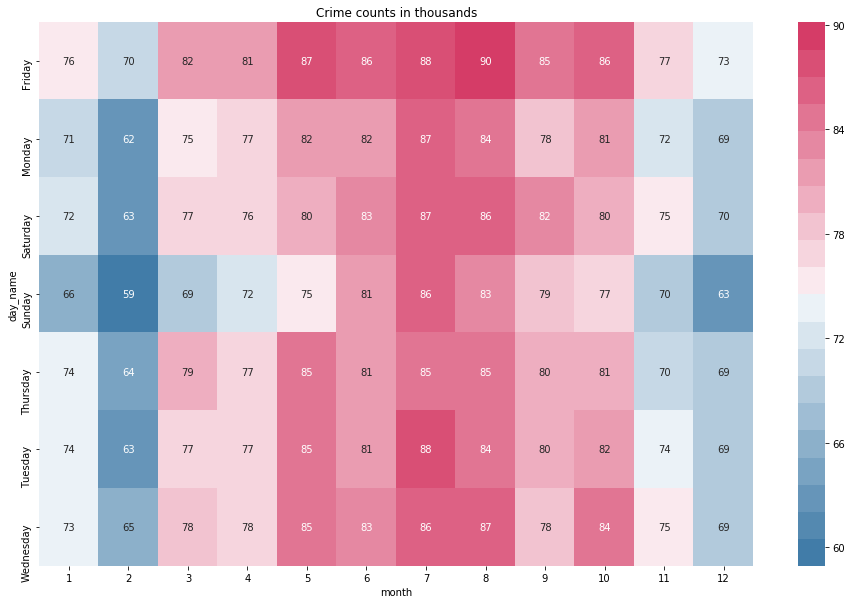

In [60]:
# But when do crimes happen?
agg_month_dayname = agg_data.groupby(by=["month", "day_name"], as_index=False).sum()
agg_month_dayname["crime_count_1000s"] = agg_month_dayname["crime_count"] / 1000
heatmap_data = agg_month_dayname.pivot("day_name", "month", "crime_count_1000s")
col_palette = sns.diverging_palette(240, 1, n=20)
plt.figure(figsize=(16, 10))
plt.title("Crime counts in thousands")
g = sns.heatmap(data=heatmap_data, cmap=col_palette, annot=True)

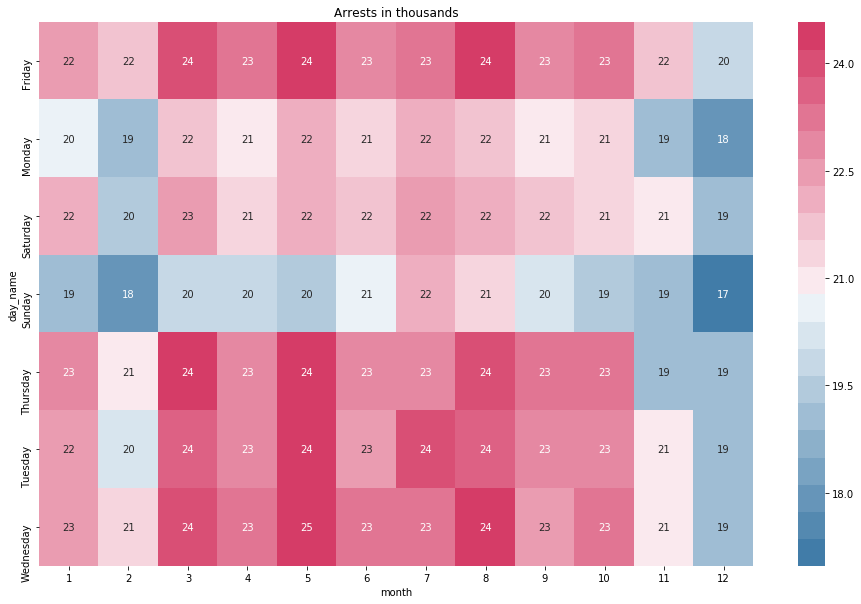

In [61]:
# and arrests?
agg_month_dayname["arrest_1000s"] = agg_month_dayname["Arrest"] / 1000
heatmap_data = agg_month_dayname.pivot("day_name", "month", "arrest_1000s")
col_palette = sns.diverging_palette(240, 1, n=20)
plt.figure(figsize=(16, 10))
plt.title("Arrests in thousands")
g = sns.heatmap(data=heatmap_data, cmap=col_palette, annot=True)